## Scripts for Extracting and Proccessing the SIGIR data

In [32]:
import time
import os.path
from requests import get  # to make GET request


def download(url, file_name):
    # open in binary mode
    headers={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
    }
    with open(file_name, "wb") as f:
        # get request
        response = get(url,headers=headers)
        # write to file
        f.write(response.content)
        
def make_sp_name(spid):
    return "data/sigir-{0}.html".format(spid)

def get_paper_id(paper_url):
    i = paper_url.find('=')
    j = paper_url.find('&',i)
    pid = paper_url[i+1:j]
    return pid

## Download all the SIGIR proceedings HTML pages from ACM

In [275]:
# These are all the ids to SIGIR proceeings 1971 - 2017
spids40 = ['800096','511706','636669','511285','511754','636713','511793','636805','253495','253168',
         '42005','62437','96749','75334','122860','133160','160688','188490','215206','243199','258525','290941'
        ,'564376','383952','345508','312624','290941','860435','1008992','1076034','1148170','1277741','1390334',
         '1571941','1835449','2009916','2348283','2484028','2600428','2766462','2911451','3077136']

spids = spids40

spfiles = []

# Only downloads pages that are not already/previously downloaded
for spid in spids:
    sigir_url = "http://dl.acm.org/citation.cfm?id={0}&preflayout=flat".format(spid)
    sigir_head_file = make_sp_name(spid)
    spfiles.append(sigir_head_file)
    print(sigir_head_file)
    if not os.path.isfile(sigir_head_file): 
        print("downloading " + sigir_head_file)
        download(sigir_url, sigir_head_file)
        time.sleep(1)


data/sigir-800096.html
data/sigir-511706.html
data/sigir-636669.html
data/sigir-511285.html
data/sigir-511754.html
data/sigir-636713.html
data/sigir-511793.html
data/sigir-636805.html
data/sigir-253495.html
data/sigir-253168.html
data/sigir-42005.html
data/sigir-62437.html
data/sigir-96749.html
data/sigir-75334.html
data/sigir-122860.html
data/sigir-133160.html
data/sigir-160688.html
data/sigir-188490.html
data/sigir-215206.html
data/sigir-243199.html
data/sigir-258525.html
data/sigir-290941.html
data/sigir-564376.html
data/sigir-383952.html
data/sigir-345508.html
data/sigir-312624.html
data/sigir-290941.html
data/sigir-860435.html
data/sigir-1008992.html
data/sigir-1076034.html
data/sigir-1148170.html
data/sigir-1277741.html
data/sigir-1390334.html
data/sigir-1571941.html
data/sigir-1835449.html
data/sigir-2009916.html
data/sigir-2348283.html
data/sigir-2484028.html
data/sigir-2600428.html
data/sigir-2766462.html
data/sigir-2911451.html


## Functions for extracting different pieces of data from the SIGIR pages

In [223]:
import re

def extract_url(line):
    i = line.find('citation.cfm')
    j = line.find('"',i+1)
    url = line[i:j]
    return url


def remove_non_article_links(line, spid):
    r = ['flat','tabs','prox']
    r.append(spid)
    
    for w in r:
        if line.find(w)>0:
            line = ""
    
    return line

def strip_cfs(line):
    i = line.find("&CFID")
    sline = line[0:i+1]
    return sline
    

def parse_out_papers(file_name,spid):
    papers = []
    with open(file_name, "r") as f:
        line = f.readline()
        while line:
            if "citation" in line:
                line = remove_non_article_links(line,spid)
                line = strip_cfs(line)
                url = extract_url(line)              
                if url:
                    papers.append('http://dl.acm.org/{0}{1}'.format(url,'&preflayout=flat'))
            line = f.readline()
            
    return papers


def extract_author_id(line):
    i = line.find('author_page.cfm')
    j = line.find('"',i+1)
    aid = line[i:j]
    return aid

def parse_out_authors(file_name):
    authors = []
    with open(file_name, "r") as f:
        line = f.readline()
        while line:
            if "author_page" in line:
                line = strip_cfs(line)
                aid = extract_author_id(line)
                if aid:
                    authors.append(aid)
            line = f.readline()
            
    return authors


def parse_out_year(file_name):
    year = 0
    reyear = re.compile(r'\d\d\d\d Proceeding')
    with open(file_name, "r") as f:
        line = f.readline()
        while line:
            if " Proceeding" in line:
                d = reyear.search(line)
                if d:
                    year = int(d.group()[0:4])
                    break
            line = f.readline()
    return year


## Calculate which authors had the greatest span between papers at SIGIR

In [265]:
def max_span(year_list):
    #finds the max span between years
    max_span = 0
    years = (0,0)
    
    if len(year_list) == 1:
        return max_span, years
    
    prev_year = year_list[0]
    for curr_year in year_list[1:]:
        curr_span = curr_year-prev_year
        if curr_span > max_span:
            max_span = curr_span
            years = (prev_year,curr_year)
        prev_year = curr_year
    
    return max_span, years


# year author dict
ya = {}

for spf in spfiles:
    authors = parse_out_authors(spf)
    year = parse_out_year(spf)
    ya[year] = authors
    #print(year, len(authors))
    
# author year dict
au = {}    
    
for year in ya:
    for author in ya[year]:
        if author in au:
            yl = au[author]
        else:
            yl = []
        yl.append(year)
        au[author] = yl
        
# Print out the authors where the span is greater than 20 years
        
for author in au:
    (ms,ys) = max_span(au[author])
    if ms > 17:
        print(author, ms, ys)
        


author_page.cfm?id=81100409020 18 (1982, 2000)
author_page.cfm?id=81100489485 19 (1981, 2000)
author_page.cfm?id=81100038060 19 (1985, 2004)
author_page.cfm?id=81100609693 24 (1989, 2013)
author_page.cfm?id=81100172373 18 (1993, 2011)
author_page.cfm?id=81100481185 19 (1993, 2012)


In [25]:
print(au["author_page.cfm?id=81100618039"])

[1984, 2005]


## Count how many references and how many citations each paper has

In [266]:
def count_references(file_name):
    references = 0
    citations = 0
    year = 0
    
    redate = re.compile(r'\d\d\d\d Article')
    
    do_count = 0 # flag
    
    with open(file_name, "r") as f:
        line = f.readline()
        while line:
            if "REFERENCES" in line:
                do_count = 1
            if ("CITED BY" in line): 
                do_count = 2
            if ("INDEX TERMS" in line):
                do_count = 0
            
            if do_count == 1:
                if '"abstract"' in line:
                    references += 1 
            if do_count == 2:
                a = '"abstract"'
                if a in line:
                    i = line.find(a)
                    j = line.find(' ',i)
                    c = line[i+len(a)+1:j+1]
                                        
                    citations = c.strip()
                    do_count = 0
                    
            if " Article" in line:
                d = redate.search(line)
                if d:
                    year = d.group()[0:4]
                
            line = f.readline()

    if references > 0:
        references = references -1
    return [year, references, citations]

In [37]:
# An example for paper id 2767723 - where it pulls out the year, and the references, and citations.
count_references('data/2767723.html')


['2015', 23, '6']

In [38]:
def extract_paper_authors(file_name):
    """ extracts out the authors for a given paper.
    returns a list of the co-authors
    """
    authors = []
    apc = 'author_page.cfm'
    l = len(apc)
    
    do_count = 0
    with open(file_name, "r") as f:
        line = f.readline()
        while line:
            if "Published in:" in line:
                break
                
            if "Publication of" in line:
                break
                
            if "author_page" in line:
                i = line.find(apc)
                j = line.find('&',i+1)
                aid = line[i+l+4:j]
                #print(aid)
                if aid:
                    authors.append(aid)
                
            line = f.readline()
    return authors

In [39]:
a = extract_paper_authors('data/564499.html')
print(a)
a = extract_paper_authors('data/42021.html')
print(a)



['81342491681', '81100007320', '81100426162', '81100575144', '81337491961', '81100485150', '81452611166']
['81100183521', '81100503766']


In [40]:
def make_node_list(authors):
    x = []
    y = []
    for a in authors:
        for b in authors:
            if a != b:
                x.append(a)
                y.append(b)
    print(x,y)
                

In [92]:
a = ['1','2','3']
make_node_list(a)

['1', '1', '2', '2', '3', '3'] ['2', '3', '1', '3', '1', '2']


## for each proceedings html page, extract out all the papers

In [276]:
counts = []
spc = []
for spid in spids:
    sigir_head_file = make_sp_name(spid)
    papers = parse_out_papers(sigir_head_file, spid)
    # for each paper in the proceedings, download the paper
    for p in papers:
        pid = get_paper_id(p)
        paper_file = 'data/{0}.html'.format(pid)
        
        if not os.path.isfile(paper_file): 
            download(p, paper_file)
            time.sleep(2)    
        
        [year, refs,cites] = count_references(paper_file)
        counts.append([pid, year, refs, cites]) 
    
    spc.append(len(papers))

In [268]:
# Save the counts data to file
with open("counts.txt", "w") as f:
    for c in counts:
        f.write("{0} {1} {2} {3}\n".format(c[0], c[1], c[2], c[3] ))


In [156]:
def compute_closest(mref, mcite, threshold):
    
    counts = []

    with open("counts.txt",'r') as f:
        line = f.readline()
        while line:
            (spid, year, refs, cites) = line.split()
            cites = int( cites.replace(',','') )
            refs = int(refs)
            score = ((refs-mref)*(refs-mref)) + ((cites-mcite)*(cites-mcite))
            counts.append([spid, int(year), refs, cites, score])
            if score < threshold:
                print("paper id: {0} year: {1} refs: {2} cites: {3} score: {4}".format( spid, year, refs, cites, score))
                print("http://dl.acm.org/citation.cfm?id={0}".format(spid))
            line = f.readline()


## Closest paper(s) to 40 refs and 40 cites

In [157]:
compute_closest(40,40,10)

paper id: 98244 year: 1989 refs: 40 cites: 41 score: 1
http://dl.acm.org/citation.cfm?id=98244
paper id: 2009998 year: 2011 refs: 39 cites: 40 score: 1
http://dl.acm.org/citation.cfm?id=2009998


In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

counts = []

with open("counts.txt",'r') as f:
    line = f.readline()
    while line:
        (spid, year, refs, cites) = line.split()
        cites = int( cites.replace(',','') )
        refs = int(refs)
        counts.append([spid, int(year), refs, cites])
        line = f.readline()

df = pd.DataFrame(counts)
m = df.mean()
print(m)

0            inf
1    2005.398951
2      16.851287
3      19.669685
dtype: float64


In [159]:
len(counts)

4196

## Closes paper(s) to the mean number of refs and mean number of cites

In [160]:
mref = m[2]
mcite = m[3]
print(mref,mcite)
compute_closest(mref,mcite,0.3)

16.8512869399 19.6696854147


## Random plots

<function matplotlib.pyplot.show>

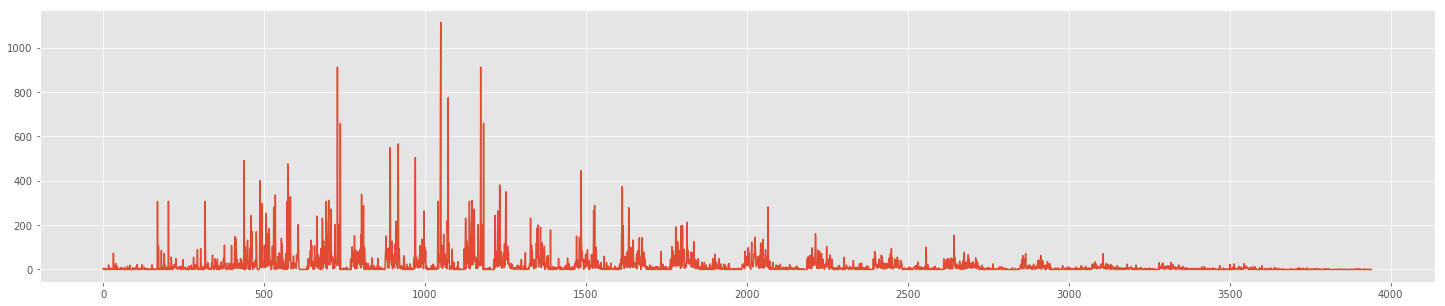

In [46]:
#times = pd.DatetimeIndex(df[1])
#grouped = df.groupby(df[1]).mean()
plt.figure(figsize=(25,5))
plt.plot(df[3])
plt.show

In [39]:
df.head()

,0,1,2,3,4
0,803132,1978,0,4,561.86
1,803133,1978,4,2,516.98
2,803134,1978,6,0,550.42
3,803135,1978,22,2,388.10
4,803136,1978,13,0,451.30


In [60]:
times = pd.DatetimeIndex(df[1])
grouped = df.groupby(df[1]).mean()

<function matplotlib.pyplot.show>

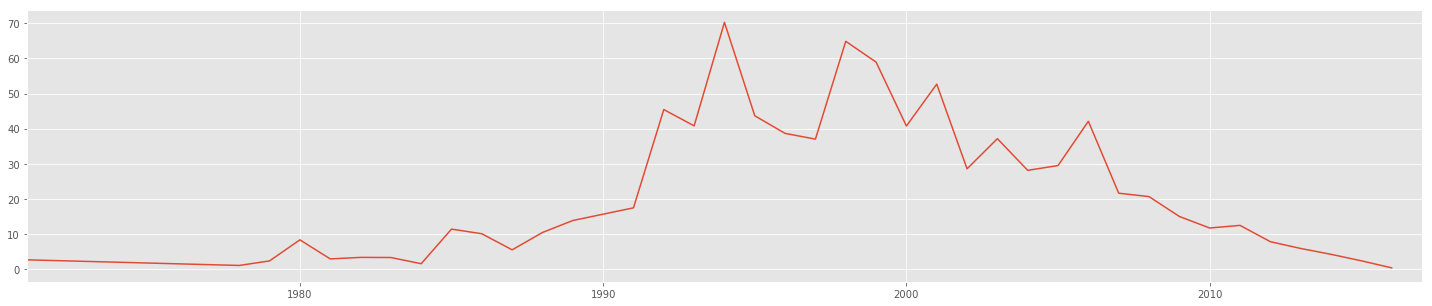

In [62]:
plt.figure(figsize=(25,5))
plt.plot(grouped[3])
plt.xlim([1971,2017])
plt.show

In [277]:

pc = 0
x = []
y = []
counts = {}
solo_counts = {}
solo_papers = {}
for spid in spids:
    sigir_head_file = make_sp_name(spid)
    papers = parse_out_papers(sigir_head_file, spid)
    # for each paper in the proceedings, download the paper
    for p in papers:
        pid = get_paper_id(p)
        paper_file = 'data/{0}.html'.format(pid)
        pc +=1 
        authors = extract_paper_authors(paper_file)
        
        l = len(authors)
        if l in counts:
            counts[l] += 1
        else:
            counts[l] = 1
        
        if (len(authors)>1):
             for a in authors:
                for b in authors:
                    if a != b:
                        x.append(a)
                        y.append(b)
        elif (len(authors)==1):
            a = authors[0]
            if a in solo_counts:
                solo_counts[a] += 1
            else:
                solo_counts[a] = 1

            if a in solo_papers:
                solo_papers[a].append(pid)
            else:
                solo_papers[a] = [pid]
                

#for c in counts:
#    print(c, counts[c])
            
for a in solo_counts:
    if solo_counts[a] > 6:
        print(a, solo_counts[a])
        print(solo_papers[a])


with open("graph.txt", "w") as f:
    for i in range(0,len(x)):
        f.write("{0} {1}\n".format(x[i], y[i] ))

print(pc)

81328489030 8
['636819', '253522', '253226', '75338', '122879', '243266', '258531', '564461']
81339534035 10
['253524', '253203', '160715', '188508', '291017', '383963', '291017', '1009121', '1572138', '2609524']
81100362356 7
['253221', '75343', '133202', '160754', '238480', '215372', '243325']
81100193167 8
['860529', '1148261', '1148322', '1277756', '1390454', '2348517', '2911492', '2914684']
3941


In [278]:
import networkx as nx
G = nx.Graph()
with open("graph.txt",'r') as f:
    line = f.readline()
    while line:
        (a,b) = line.split()
        G.add_edge(a,b)
        line = f.readline()

#G.add_edge('81316487451','81100617179')
#G.add_edge('81100617179','81316487451')

#G.add_edge('81316487451','81100113287')
#G.add_edge('81100113287','81316487451')



In [279]:
short = nx.shortest_path_length(G)

In [280]:
for key in short:
    a = short[key]
    sum = 0
    if len(a) > 119:
        for b in a:
            sum += a[b]
        m = float(sum)/float(len(a))
        if m < 3.8:
            print(key, len(a), sum, m)   

81100652508 3275 12385 3.781679389312977
81363594457 3275 12398 3.785648854961832
81100390699 3275 12359 3.773740458015267
81100617179 3275 12288 3.75206106870229
81100113287 3275 12339 3.7676335877862597


In [ ]:
Ryen White (3.75)
Nick Craswell (3.76)
Charlie Clarke (3.77)
Bruce Croft (3.78)
Jamie Callan (3.78)

In [167]:
#print(short['81100617179'])
a =short['81100617179'] # Ryen White
a = short['81100625548'] # Wensi Xi
sum = 0
for b in a:
    sum += a[b]
    m = float(sum)/float(len(a))
print(m)

4.660152671755725


In [1]:
#print(short['81100617179'])

In [273]:
len(short)

5073

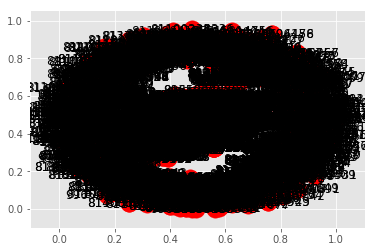

In [186]:
nx.draw_networkx(G)

In [187]:
import matplotlib.pyplot as plt
plt.draw()